In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
df = pd.read_excel("C:/Users/612491098/Documents/Worksheet in BookingForecast.xlsx")

In [292]:
df.head()

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
0,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Business Cabin,12,8,340.88,NaN
1,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Economy Cabin,177,113,80.33,NaN
2,BOM,DXB,869,2014-04-03,13:30:00,2014-04-03,15:30:00,Business Cabin,12,6,256.50,NaN
3,BOM,DXB,869,2014-04-03,13:30:00,2014-04-03,15:30:00,Economy Cabin,177,106,82.26,NaN
4,BOM,DXB,870,2014-04-03,19:10:00,2014-04-03,21:10:00,Business Cabin,12,8,400.75,NaN


In [293]:
df["DepartureTime"].value_counts()

16:35:00    908
22:15:00    908
19:10:00    908
12:15:00    734
13:30:00    602
09:15:00    602
13:25:00    306
09:10:00    132
Name: DepartureTime, dtype: int64

In [294]:
# df['DepartureDate']=pd.to_datetime(df['DepartureDate']).dt.strftime('%d-%m-%Y')
# df.isnull().sum()
df=df.drop("Forecasted Bookings",axis=1)

In [295]:
df["Departure_day"] = pd.to_datetime(df.DepartureDate, format="%d/%m/%Y").dt.day
df["Departure_month"] = pd.to_datetime(df["DepartureDate"], format = "%d/%m/%Y").dt.month
df["Arrival_day"] = pd.to_datetime(df.ArrivalDate, format="%d/%m/%Y").dt.day
df["Arrival_month"] = pd.to_datetime(df["ArrivalDate"], format = "%d/%m/%Y").dt.month
df.head()

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Departure_day,Departure_month,Arrival_day,Arrival_month
0,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Business Cabin,12,8,340.88,3,4,3,4
1,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Economy Cabin,177,113,80.33,3,4,3,4
2,BOM,DXB,869,2014-04-03,13:30:00,2014-04-03,15:30:00,Business Cabin,12,6,256.50,3,4,3,4
3,BOM,DXB,869,2014-04-03,13:30:00,2014-04-03,15:30:00,Economy Cabin,177,106,82.26,3,4,3,4
4,BOM,DXB,870,2014-04-03,19:10:00,2014-04-03,21:10:00,Business Cabin,12,8,400.75,3,4,3,4


In [296]:
df["DepartureTime"].value_counts()

16:35:00    908
22:15:00    908
19:10:00    908
12:15:00    734
13:30:00    602
09:15:00    602
13:25:00    306
09:10:00    132
Name: DepartureTime, dtype: int64

In [297]:
df.head()

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Departure_day,Departure_month,Arrival_day,Arrival_month
0,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Business Cabin,12,8,340.88,3,4,3,4
1,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Economy Cabin,177,113,80.33,3,4,3,4
2,BOM,DXB,869,2014-04-03,13:30:00,2014-04-03,15:30:00,Business Cabin,12,6,256.50,3,4,3,4
3,BOM,DXB,869,2014-04-03,13:30:00,2014-04-03,15:30:00,Economy Cabin,177,106,82.26,3,4,3,4
4,BOM,DXB,870,2014-04-03,19:10:00,2014-04-03,21:10:00,Business Cabin,12,8,400.75,3,4,3,4


In [298]:
cabin_map={"Business Cabin":1,"Economy Cabin":0}

df["Cabin"]=df["Cabin"].map(cabin_map)
df.head()

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Departure_day,Departure_month,Arrival_day,Arrival_month
0,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,1,12,8,340.88,3,4,3,4
1,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,0,177,113,80.33,3,4,3,4
2,BOM,DXB,869,2014-04-03,13:30:00,2014-04-03,15:30:00,1,12,6,256.50,3,4,3,4
3,BOM,DXB,869,2014-04-03,13:30:00,2014-04-03,15:30:00,0,177,106,82.26,3,4,3,4
4,BOM,DXB,870,2014-04-03,19:10:00,2014-04-03,21:10:00,1,12,8,400.75,3,4,3,4


In [299]:
Origin_map={"BOM":1,"DXB":0}
df["Origin"]=df["Origin"].map(Origin_map)
df["Destination"]=df["Destination"].map(Origin_map)
df.head()

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Departure_day,Departure_month,Arrival_day,Arrival_month
0,1,0,697,2014-04-03,09:15:00,2014-04-03,11:15:00,1,12,8,340.88,3,4,3,4
1,1,0,697,2014-04-03,09:15:00,2014-04-03,11:15:00,0,177,113,80.33,3,4,3,4
2,1,0,869,2014-04-03,13:30:00,2014-04-03,15:30:00,1,12,6,256.50,3,4,3,4
3,1,0,869,2014-04-03,13:30:00,2014-04-03,15:30:00,0,177,106,82.26,3,4,3,4
4,1,0,870,2014-04-03,19:10:00,2014-04-03,21:10:00,1,12,8,400.75,3,4,3,4


In [300]:
df["FlightID"].value_counts()
Flight_dummies = pd.get_dummies(df.FlightID, prefix='Flight')

In [301]:
df = pd.concat([df, Flight_dummies], axis=1)
df.head()

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,...,Departure_day,Departure_month,Arrival_day,Arrival_month,Flight_697,Flight_698,Flight_868,Flight_869,Flight_870,Flight_871
0,1,0,697,2014-04-03,09:15:00,2014-04-03,11:15:00,1,12,8,...,3,4,3,4,1,0,0,0,0,0
1,1,0,697,2014-04-03,09:15:00,2014-04-03,11:15:00,0,177,113,...,3,4,3,4,1,0,0,0,0,0
2,1,0,869,2014-04-03,13:30:00,2014-04-03,15:30:00,1,12,6,...,3,4,3,4,0,0,0,1,0,0
3,1,0,869,2014-04-03,13:30:00,2014-04-03,15:30:00,0,177,106,...,3,4,3,4,0,0,0,1,0,0
4,1,0,870,2014-04-03,19:10:00,2014-04-03,21:10:00,1,12,8,...,3,4,3,4,0,0,0,0,1,0


In [302]:
df=df.drop(["FlightID"],axis=1)

In [303]:
df['Is_weekend'] = np.where(df['DepartureDate'].dt.day_name().isin(['Sunday','Saturday']),1,0)

In [304]:
df[["Departure_HOUR","Departure_MINUTES","Departure_SECONDS"]]=df['DepartureTime'].astype(str).str.split(pat=":", expand=True)
df[["Arrival_HOUR","Arrival_MINUTES","Arrival_SECONDS"]]=df['ArrivalTime'].astype(str).str.split(pat=":", expand=True)
df.head()

,Origin,Destination,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,...,Flight_869,Flight_870,Flight_871,Is_weekend,Departure_HOUR,Departure_MINUTES,Departure_SECONDS,Arrival_HOUR,Arrival_MINUTES,Arrival_SECONDS
0,1,0,2014-04-03,09:15:00,2014-04-03,11:15:00,1,12,8,340.88,...,0,0,0,0,09,15,00,11,15,00
1,1,0,2014-04-03,09:15:00,2014-04-03,11:15:00,0,177,113,80.33,...,0,0,0,0,09,15,00,11,15,00
2,1,0,2014-04-03,13:30:00,2014-04-03,15:30:00,1,12,6,256.50,...,1,0,0,0,13,30,00,15,30,00
3,1,0,2014-04-03,13:30:00,2014-04-03,15:30:00,0,177,106,82.26,...,1,0,0,0,13,30,00,15,30,00
4,1,0,2014-04-03,19:10:00,2014-04-03,21:10:00,1,12,8,400.75,...,0,1,0,0,19,10,00,21,10,00


In [305]:
df["Departure_HOUR"]=df["Departure_HOUR"].astype(int)
df["Arrival_HOUR"]=df["Arrival_HOUR"].astype(int)
df=df.drop(["DepartureTime","ArrivalTime","Arrival_SECONDS","Departure_SECONDS","Departure_MINUTES","Arrival_MINUTES"],axis=1)

In [306]:
pred_data=df[df["DepartureDate"]>"30-04-2015"]

In [307]:
train=df[df["DepartureDate"]<"30-04-2015"]
train.head()

,Origin,Destination,DepartureDate,ArrivalDate,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Departure_day,Departure_month,...,Arrival_month,Flight_697,Flight_698,Flight_868,Flight_869,Flight_870,Flight_871,Is_weekend,Departure_HOUR,Arrival_HOUR
0,1,0,2014-04-03,2014-04-03,1,12,8,340.88,3,4,...,4,1,0,0,0,0,0,0,9,11
1,1,0,2014-04-03,2014-04-03,0,177,113,80.33,3,4,...,4,1,0,0,0,0,0,0,9,11
2,1,0,2014-04-03,2014-04-03,1,12,6,256.50,3,4,...,4,0,0,0,1,0,0,0,13,15
3,1,0,2014-04-03,2014-04-03,0,177,106,82.26,3,4,...,4,0,0,0,1,0,0,0,13,15
4,1,0,2014-04-03,2014-04-03,1,12,8,400.75,3,4,...,4,0,0,0,0,1,0,0,19,21


In [308]:
pred_data.head()

,Origin,Destination,DepartureDate,ArrivalDate,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Departure_day,Departure_month,...,Arrival_month,Flight_697,Flight_698,Flight_868,Flight_869,Flight_870,Flight_871,Is_weekend,Departure_HOUR,Arrival_HOUR
2178,1,0,2015-05-01,2015-05-01,1,12,10,171.80,1,5,...,5,1,0,0,0,0,0,0,9,11
2179,1,0,2015-05-01,2015-05-01,0,183,173,105.55,1,5,...,5,1,0,0,0,0,0,0,9,11
2180,1,0,2015-05-01,2015-05-01,1,12,9,136.44,1,5,...,5,0,0,0,1,0,0,0,13,15
2181,1,0,2015-05-01,2015-05-01,0,183,131,107.30,1,5,...,5,0,0,0,1,0,0,0,13,15
2182,1,0,2015-05-01,2015-05-01,1,12,4,79.33,1,5,...,5,0,0,0,0,1,0,0,19,21


In [309]:
train_size = int(len(train) * 0.80)
test_size = len(train) - train_size

In [310]:
train_e , test_e = train.loc[0:train_size,:], train.loc[train_size:len(train),:]

In [311]:
train_X=train_e.drop(["DepartureDate","ArrivalDate","CabinBookings"],axis=1)
train_y=train_e['CabinBookings']
test_X=test_e.drop(["DepartureDate","ArrivalDate","CabinBookings"],axis=1)
test_y=test_e['CabinBookings']

In [359]:
import xgboost as xg

xg_reg = xg.XGBRegressor(objective ='count:poisson', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 9, alpha = 20, n_estimators = 200)

In [360]:
xg_reg.fit(train_X,train_y)

XGBRegressor(alpha=20, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0.699999988, max_depth=9,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=200, n_jobs=4, num_parallel_tree=1,
       objective='count:poisson', random_state=0, reg_alpha=20,
       reg_lambda=1, scale_pos_weight=None, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [361]:
preds = xg_reg.predict(test_X)

In [362]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, preds))
print("RMSE: %f" % (rmse))

RMSE: 23.088549


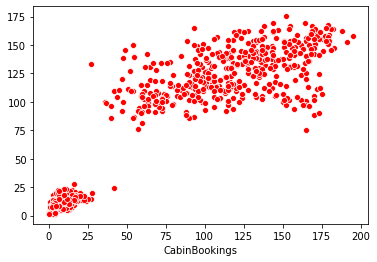

In [363]:
sns.scatterplot(test_y,preds,color="r")

# Final Prediction

In [366]:
pred_data_X=pred_data.drop(["DepartureDate","ArrivalDate","CabinBookings"],axis=1)
pred_data_y=pred_data['CabinBookings']

In [367]:
final_pred=xg_reg.predict(pred_data_X)

In [368]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(pred_data_y, final_pred))
print("RMSE: %f" % (rmse))

RMSE: 17.566174


In [371]:
pred_data["Forecasted Bookings"]=final_pred

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [374]:
pred_data.to_excel("C:/Users/612491098/Documents/results_booking.xlsx")